# Studing and clearing dataset 

First of all connect all libraries for work.

In [2]:
#import libraries for work
import numpy as np
import pandas as pd
import sqlite3

#for better visibility
from IPython.display import display, HTML
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
#connect to the created Database
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

In [313]:
#information about tables
    #select all tables from database
cur.execute("""select name from sqlite_master where type = 'table'""")
    
    # put all tables name into variable tables_name
tables_name = cur.fetchall()
    
    # for each table check information about columns
for table_name in tables_name:
    df = pd.read_sql(f"PRAGMA table_info("+(table_name[0])+")", conn)
    
    # count rows in each table
    row_count = cur.execute("select count(*) from "+(table_name[0])+"").fetchone()[0]
        
    # pretty printing
    print(color.BLUE+color.BOLD + table_name[0]+ color.END, "==", row_count, "rows")
    display(HTML(df.to_html()))

tmdb_movies == 26517 rows


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,genre_ids,TEXT,0,None,0
2,2,id,INTEGER,0,None,0
3,3,original_language,TEXT,0,None,0
4,4,original_title,TEXT,0,None,0
5,5,popularity,REAL,0,None,0
6,6,release_date,TEXT,0,None,0
7,7,title,TEXT,0,None,0
8,8,vote_average,REAL,0,None,0
9,9,vote_count,INTEGER,0,None,0


imdb_title_crew == 146144 rows


,cid,name,type,notnull,dflt_value,pk
0,0,tconst,TEXT,0,None,0
1,1,directors,TEXT,0,None,0
2,2,writers,TEXT,0,None,0


tn_movie_budgets == 5782 rows


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,release_date,TEXT,0,None,0
2,2,movie,TEXT,0,None,0
3,3,production_budget,TEXT,0,None,0
4,4,domestic_gross,TEXT,0,None,0
5,5,worldwide_gross,TEXT,0,None,0


imdb_title_ratings == 73856 rows


,cid,name,type,notnull,dflt_value,pk
0,0,tconst,TEXT,0,None,0
1,1,averagerating,REAL,0,None,0
2,2,numvotes,INTEGER,0,None,0


imdb_name_basics == 606648 rows


,cid,name,type,notnull,dflt_value,pk
0,0,nconst,TEXT,0,None,0
1,1,primary_name,TEXT,0,None,0
2,2,birth_year,REAL,0,None,0
3,3,death_year,REAL,0,None,0
4,4,primary_profession,TEXT,0,None,0
5,5,known_for_titles,TEXT,0,None,0


imdb_title_principals == 1028186 rows


,cid,name,type,notnull,dflt_value,pk
0,0,tconst,TEXT,0,None,0
1,1,ordering,INTEGER,0,None,0
2,2,nconst,TEXT,0,None,0
3,3,category,TEXT,0,None,0
4,4,job,TEXT,0,None,0
5,5,characters,TEXT,0,None,0


imdb_title_akas == 331703 rows


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,TEXT,0,None,0
1,1,ordering,INTEGER,0,None,0
2,2,title,TEXT,0,None,0
3,3,region,TEXT,0,None,0
4,4,language,TEXT,0,None,0
5,5,types,TEXT,0,None,0
6,6,attributes,TEXT,0,None,0
7,7,is_original_title,REAL,0,None,0


bom_movie_gross == 3387 rows


,cid,name,type,notnull,dflt_value,pk
0,0,title,TEXT,0,None,0
1,1,studio,TEXT,0,None,0
2,2,domestic_gross,REAL,0,None,0
3,3,foreign_gross,TEXT,0,None,0
4,4,year,INTEGER,0,None,0


imdb_title_basics == 146144 rows


,cid,name,type,notnull,dflt_value,pk
0,0,tconst,TEXT,0,None,0
1,1,primary_title,TEXT,0,None,0
2,2,original_title,TEXT,0,None,0
3,3,start_year,INTEGER,0,None,0
4,4,runtime_minutes,REAL,0,None,0
5,5,genres,TEXT,0,None,0


rt_reviews == 54432 rows


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,review,TEXT,0,None,0
2,2,rating,TEXT,0,None,0
3,3,fresh,TEXT,0,None,0
4,4,critic,TEXT,0,None,0
5,5,top_critic,INTEGER,0,None,0
6,6,publisher,TEXT,0,None,0
7,7,date,TEXT,0,None,0


rt_movie_info == 1560 rows


,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,0
1,1,synopsis,TEXT,0,None,0
2,2,rating,TEXT,0,None,0
3,3,genre,TEXT,0,None,0
4,4,director,TEXT,0,None,0
5,5,writer,TEXT,0,None,0
6,6,theater_date,TEXT,0,None,0
7,7,dvd_date,TEXT,0,None,0
8,8,currency,TEXT,0,None,0
9,9,box_office,TEXT,0,None,0


How we can see on this results: tables from different sources have different key set to determine the uniqueness of a record 

In [157]:
# Quick look at the tables from my database
cur.execute("""select name from sqlite_master where type = 'table'""")
tables_name = cur.fetchall()

for table_name in tables_name:
    print(f"Looking at Table: {table_name[0]}")
    df = pd.read_sql(f"select * from [{table_name[0]}]", conn)
    # check for dublicate rows
    x = df.duplicated().sum()
    print(f"Looking at Table for duplicate rows: {table_name[0]}", x)
    display(df.head())
    
    print("\n")

Looking at Table: tmdb_movies
Looking at Table for duplicate rows: tmdb_movies 0


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186




Looking at Table: imdb_title_crew
Looking at Table for duplicate rows: imdb_title_crew 0


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943




Looking at Table: tn_movie_budgets
Looking at Table for duplicate rows: tn_movie_budgets 0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"




Looking at Table: imdb_title_ratings
Looking at Table for duplicate rows: imdb_title_ratings 0


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21




Looking at Table: imdb_name_basics
Looking at Table for duplicate rows: imdb_name_basics 0


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"




Looking at Table: imdb_title_principals
Looking at Table for duplicate rows: imdb_title_principals 0


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"




Looking at Table: imdb_title_akas
Looking at Table for duplicate rows: imdb_title_akas 0


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0




Looking at Table: bom_movie_gross
Looking at Table for duplicate rows: bom_movie_gross 0


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010




Looking at Table: imdb_title_basics
Looking at Table for duplicate rows: imdb_title_basics 0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"




Looking at Table: rt_reviews
Looking at Table for duplicate rows: rt_reviews 9


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,None,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,None,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,None,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,None,fresh,None,0,Cinema Scope,"October 12, 2017"




Looking at Table: rt_movie_info
Looking at Table for duplicate rows: rt_movie_info 0


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,None,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,None,128 minutes,None
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,None,200 minutes,None




Looking at Table: tmdb_genres
Looking at Table for duplicate rows: tmdb_genres 0


,index,id,name
0,0,28,Action
1,1,12,Adventure
2,2,16,Animation
3,3,35,Comedy
4,4,80,Crime


I found that table tmdb_movies has only genre ids without information about it, but on the site https://developers.themoviedb.org/3/genres we can find this information using API. API request gives us JSON files with codes and names of genges.

In [4]:
# add one more library - json
import json

In [19]:
# open file and load it into new variable data
f = open('./data/tmdb_genres1.json')
data = json.load(f)
# check what we have
data

{'genres': [{'id': '28', 'name': 'Action'},
  {'id': '12', 'name': 'Adventure'},
  {'id': '16', 'name': 'Animation'},
  {'id': '35', 'name': 'Comedy'},
  {'id': '80', 'name': 'Crime'},
  {'id': '99', 'name': 'Documentary'},
  {'id': '18', 'name': 'Drama'},
  {'id': '10751', 'name': 'Family'},
  {'id': '14', 'name': 'Fantasy'},
  {'id': '36', 'name': 'History'},
  {'id': '27', 'name': 'Horror'},
  {'id': '10402', 'name': 'Music'},
  {'id': '9648', 'name': 'Mystery'},
  {'id': '10749', 'name': 'Romance'},
  {'id': '878', 'name': 'Science Fiction'},
  {'id': '10770', 'name': 'TV Movie'},
  {'id': '53', 'name': 'Thriller'},
  {'id': '10752', 'name': 'War'},
  {'id': '37', 'name': 'Western'}]}

In [20]:
# check data types
type(data)

dict

In [7]:
type(data['genres'])

list

In [134]:
# convert json into dataframe, using pandas
genres_df = pd.DataFrame(data['genres'])
genres_df

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [9]:
# df.to_sql(tmdb_genres, conn)
db = 'movies_database.sqlite'
conn = sqlite3.connect(db)
try:
    genres_df.to_sql('tmdb_genres', conn)
except Exception as e:
    print(f"could not make table {'tmdb_genres'}")
    print(e)        

could not make table tmdb_genres
Table 'tmdb_genres' already exists.


But all movies from tmdb_movies have few genre ids in the column 'genre_ids'. Go to the next step - works with genres in tmdb_movies table.

In [118]:
# put all information into frame for closer look
query = f"select * from tmdb_movies m where m.genre_ids<>'[]'"
movie_df = pd.read_sql(query, conn)
# create a columns for each genre
for genre in genres_df['id']:
    movie_df[genre] = np.zeros(shape=movie_df.shape[0])    
movie_df

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,36,27,10402,9648,10749,878,10770,53,10752,37
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24034,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24035,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24036,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After we remove all empty values me have only 24038 rows (was 26517 rows)

In [122]:
# update information in new columns with equals genre_ids
genres_array =[]
for index, row in movie_df.iterrows():
        genres_array = row['genre_ids'].replace('[','').replace(']','').split(', ')
        #print(row)
        for g in genres_array:
            try:
                movie_df.loc[index,g]=1
            except Exception as e:
                print(f"row{index, g}")
                print(e)              

In [7]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [78]:
query = f"select * from tmdb_movies m where m.genre_ids<>'[]'"
movies = pd.read_sql(query, conn)
movies.genre_ids = movies.genre_ids.str.replace('[','')
movies.genre_ids = movies.genre_ids.str.replace(']','')
movies.genre_ids = movies.genre_ids.str.split(', ')
movies = explode(movies, ['genre_ids'])

movies.head()

,id,index,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_ids
0,12444,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
1,12444,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,14
2,12444,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,10751
3,10191,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14
4,10191,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,12


In [118]:
movies['year'] = movies.release_date.str.slice(0,4).astype(int)
movies['month'] = movies.release_date.str.slice(5,7).astype(int)
movies.head()


,id,index,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_ids,year,month
0,12444,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure,2010,11
1,12444,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy,2010,11
2,12444,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family,2010,11
3,10191,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy,2010,3
4,10191,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure,2010,3


In [119]:
#create a new dictionary for data
# worls log, should found a better solution
genres = {'28': 'Action',
'12': 'Adventure',
'16': 'Animation',
'35': 'Comedy',
'80': 'Crime',
'99': 'Documentary',
'18': 'Drama',
'10751': 'Family',
'14': 'Fantasy',
'36': 'History',
'27': 'Horror',
'10402': 'Music',
'9648': 'Mystery',
'10749': 'Romance',
'878': 'Science Fiction',
'10770': 'TV Movie',
'53': 'Thriller',
'10752': 'War',
'37': 'Western'}
for index, row in movies.iterrows():
    movies.loc[index,'genre_ids']= genres[row['genre_ids']]
    #print(movies.loc[index,'genre_ids'])
    #print(genres[row['genre_ids']])
movies.head()    

KeyError: 'Adventure'

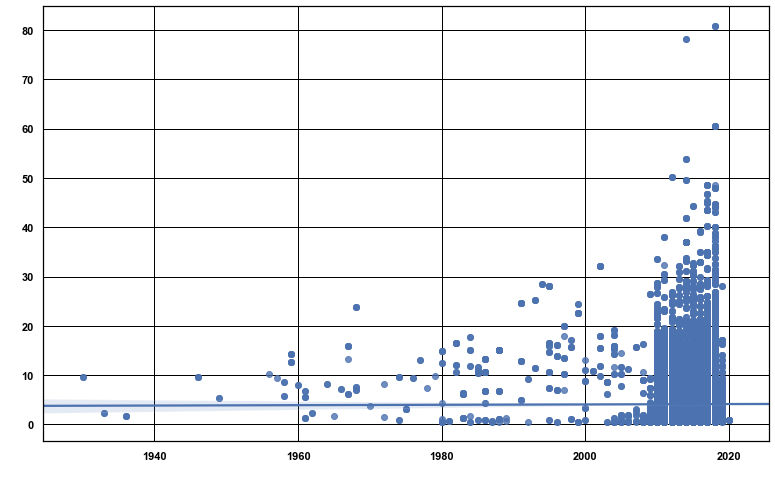

In [126]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.regplot(x='year', y='popularity', data=movies)
plt.show()

In [ ]:
plt.figure(figsize=(13, 8))
sns.distplot(movies['vote_average'], bins = 10)
plt.show()

plt.figure(figsize=(13, 8))
sns.distplot(movies['popularity'], bins = 80)
plt.show()

In [120]:
mean_vote = movies.groupby(['year', 'genre_ids'], as_index=False)['vote_average'].aggregate(np.mean)
mean_vote

,year,genre_ids,vote_average
0,1930,Drama,7.80
1,1930,War,7.80
2,1933,Horror,5.60
3,1933,Thriller,5.60
4,1936,Comedy,8.70
...,...,...,...
476,2019,Science Fiction,6.45
477,2019,Thriller,5.70
478,2019,Western,5.30
479,2020,Crime,0.00


In [121]:
mean_ratings = movies.groupby(['year', 'genre_ids'], as_index=False)['popularity'].aggregate(np.mean)
mean_ratings


,year,genre_ids,popularity
0,1930,Drama,9.583000
1,1930,War,9.583000
2,1933,Horror,2.292000
3,1933,Thriller,2.292000
4,1936,Comedy,1.653000
...,...,...,...
476,2019,Science Fiction,6.110000
477,2019,Thriller,7.718556
478,2019,Western,4.183000
479,2020,Crime,0.840000


In [135]:
df = mean_ratings[mean_ratings['year']>2000]
#df = mean_ratings[mean_ratings['genre_ids']=='Drama']
df

,year,genre_ids,popularity
194,2001,Action,10.886000
195,2001,Drama,10.886000
196,2001,Thriller,10.886000
197,2001,War,10.886000
198,2002,Action,15.067667
...,...,...,...
476,2019,Science Fiction,6.110000
477,2019,Thriller,7.718556
478,2019,Western,4.183000
479,2020,Crime,0.840000


In [ ]:
#x = mean_ratings.plot.bar(x='genre_ids', y='popularity', rot=0)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

#tips = sns.load_dataset("df")
g = sns.FacetGrid(df, row="genre_ids", col="popularity", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x123170680> (for post_execute):


KeyboardInterrupt: 

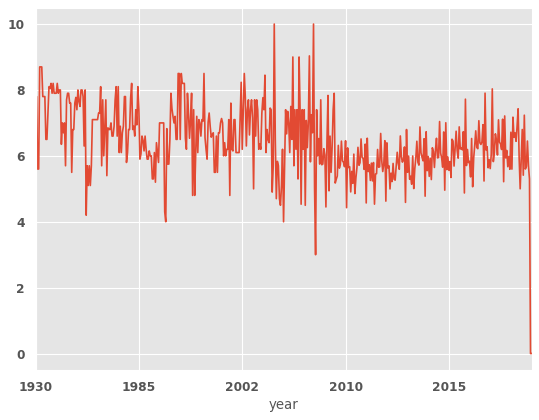

In [95]:
import matplotlib
from matplotlib import pyplot as plt 

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k') 

matplotlib.style.use('ggplot')

mean_vote.set_index('year')['vote_average'].plot()

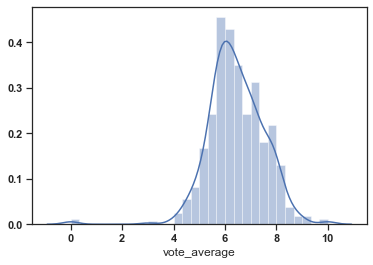

In [102]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

sns_plot = sns.distplot(mean_vote['vote_average'])
fig = sns_plot.get_figure()

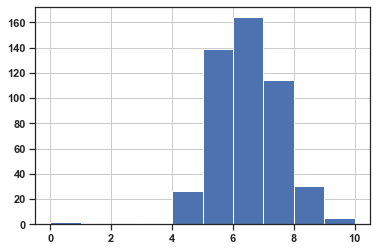

In [103]:
h = mean_vote['vote_average'].hist()
fig = h.get_figure()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

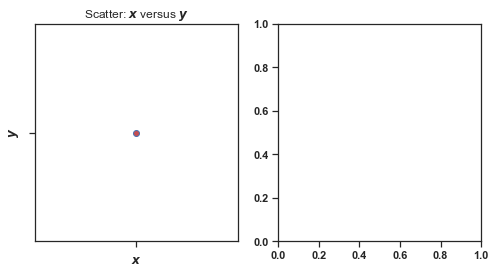

In [104]:

data = mean_vote
 
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)
 
ax1.scatter(x='', y='', marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
 
ax2.hist(
    data, bins=np.arange(data.min(), data.max()),
    label=('x', 'y')
)
 
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
 
plt.show()


In [136]:
movie_df.loc[movie_df['10770']>0]

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,36,27,10402,9648,10749,878,10770,53,10752,37
64,64,"[10770, 16, 14, 10751]",47626,en,Legend of the BoneKnapper Dragon,13.013,2010-10-15,Legend of the BoneKnapper Dragon,6.4,116,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
89,89,"[35, 10402, 10770]",44244,en,Camp Rock 2: The Final Jam,11.542,2010-09-03,Camp Rock 2: The Final Jam,6.1,878,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101,101,"[16, 10751, 10770]",50393,en,Kung Fu Panda Holiday,11.083,2010-11-26,Kung Fu Panda Holiday,6.6,110,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
158,158,"[35, 10749, 10770, 10402]",35558,en,Starstruck,9.406,2010-02-14,Starstruck,6.7,627,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
235,235,"[10770, 18, 10751, 14]",50479,en,Avalon High,8.098,2010-11-12,Avalon High,6.1,313,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23925,26381,"[10770, 99]",560930,en,Gypsy's Revenge,0.600,2018-11-06,Gypsy's Revenge,6.7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23929,26387,"[99, 10770]",525846,en,Casey Anthony's Parents Speak,0.600,2018-05-28,Casey Anthony's Parents Speak,6.5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23939,26398,"[80, 10770]",571692,en,Nightmare Best Friend,0.600,2018-12-29,Nightmare Best Friend,6.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23942,26402,"[18, 10749, 10770]",562466,en,Christmas on the Coast,0.600,2018-11-25,Christmas on the Coast,6.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


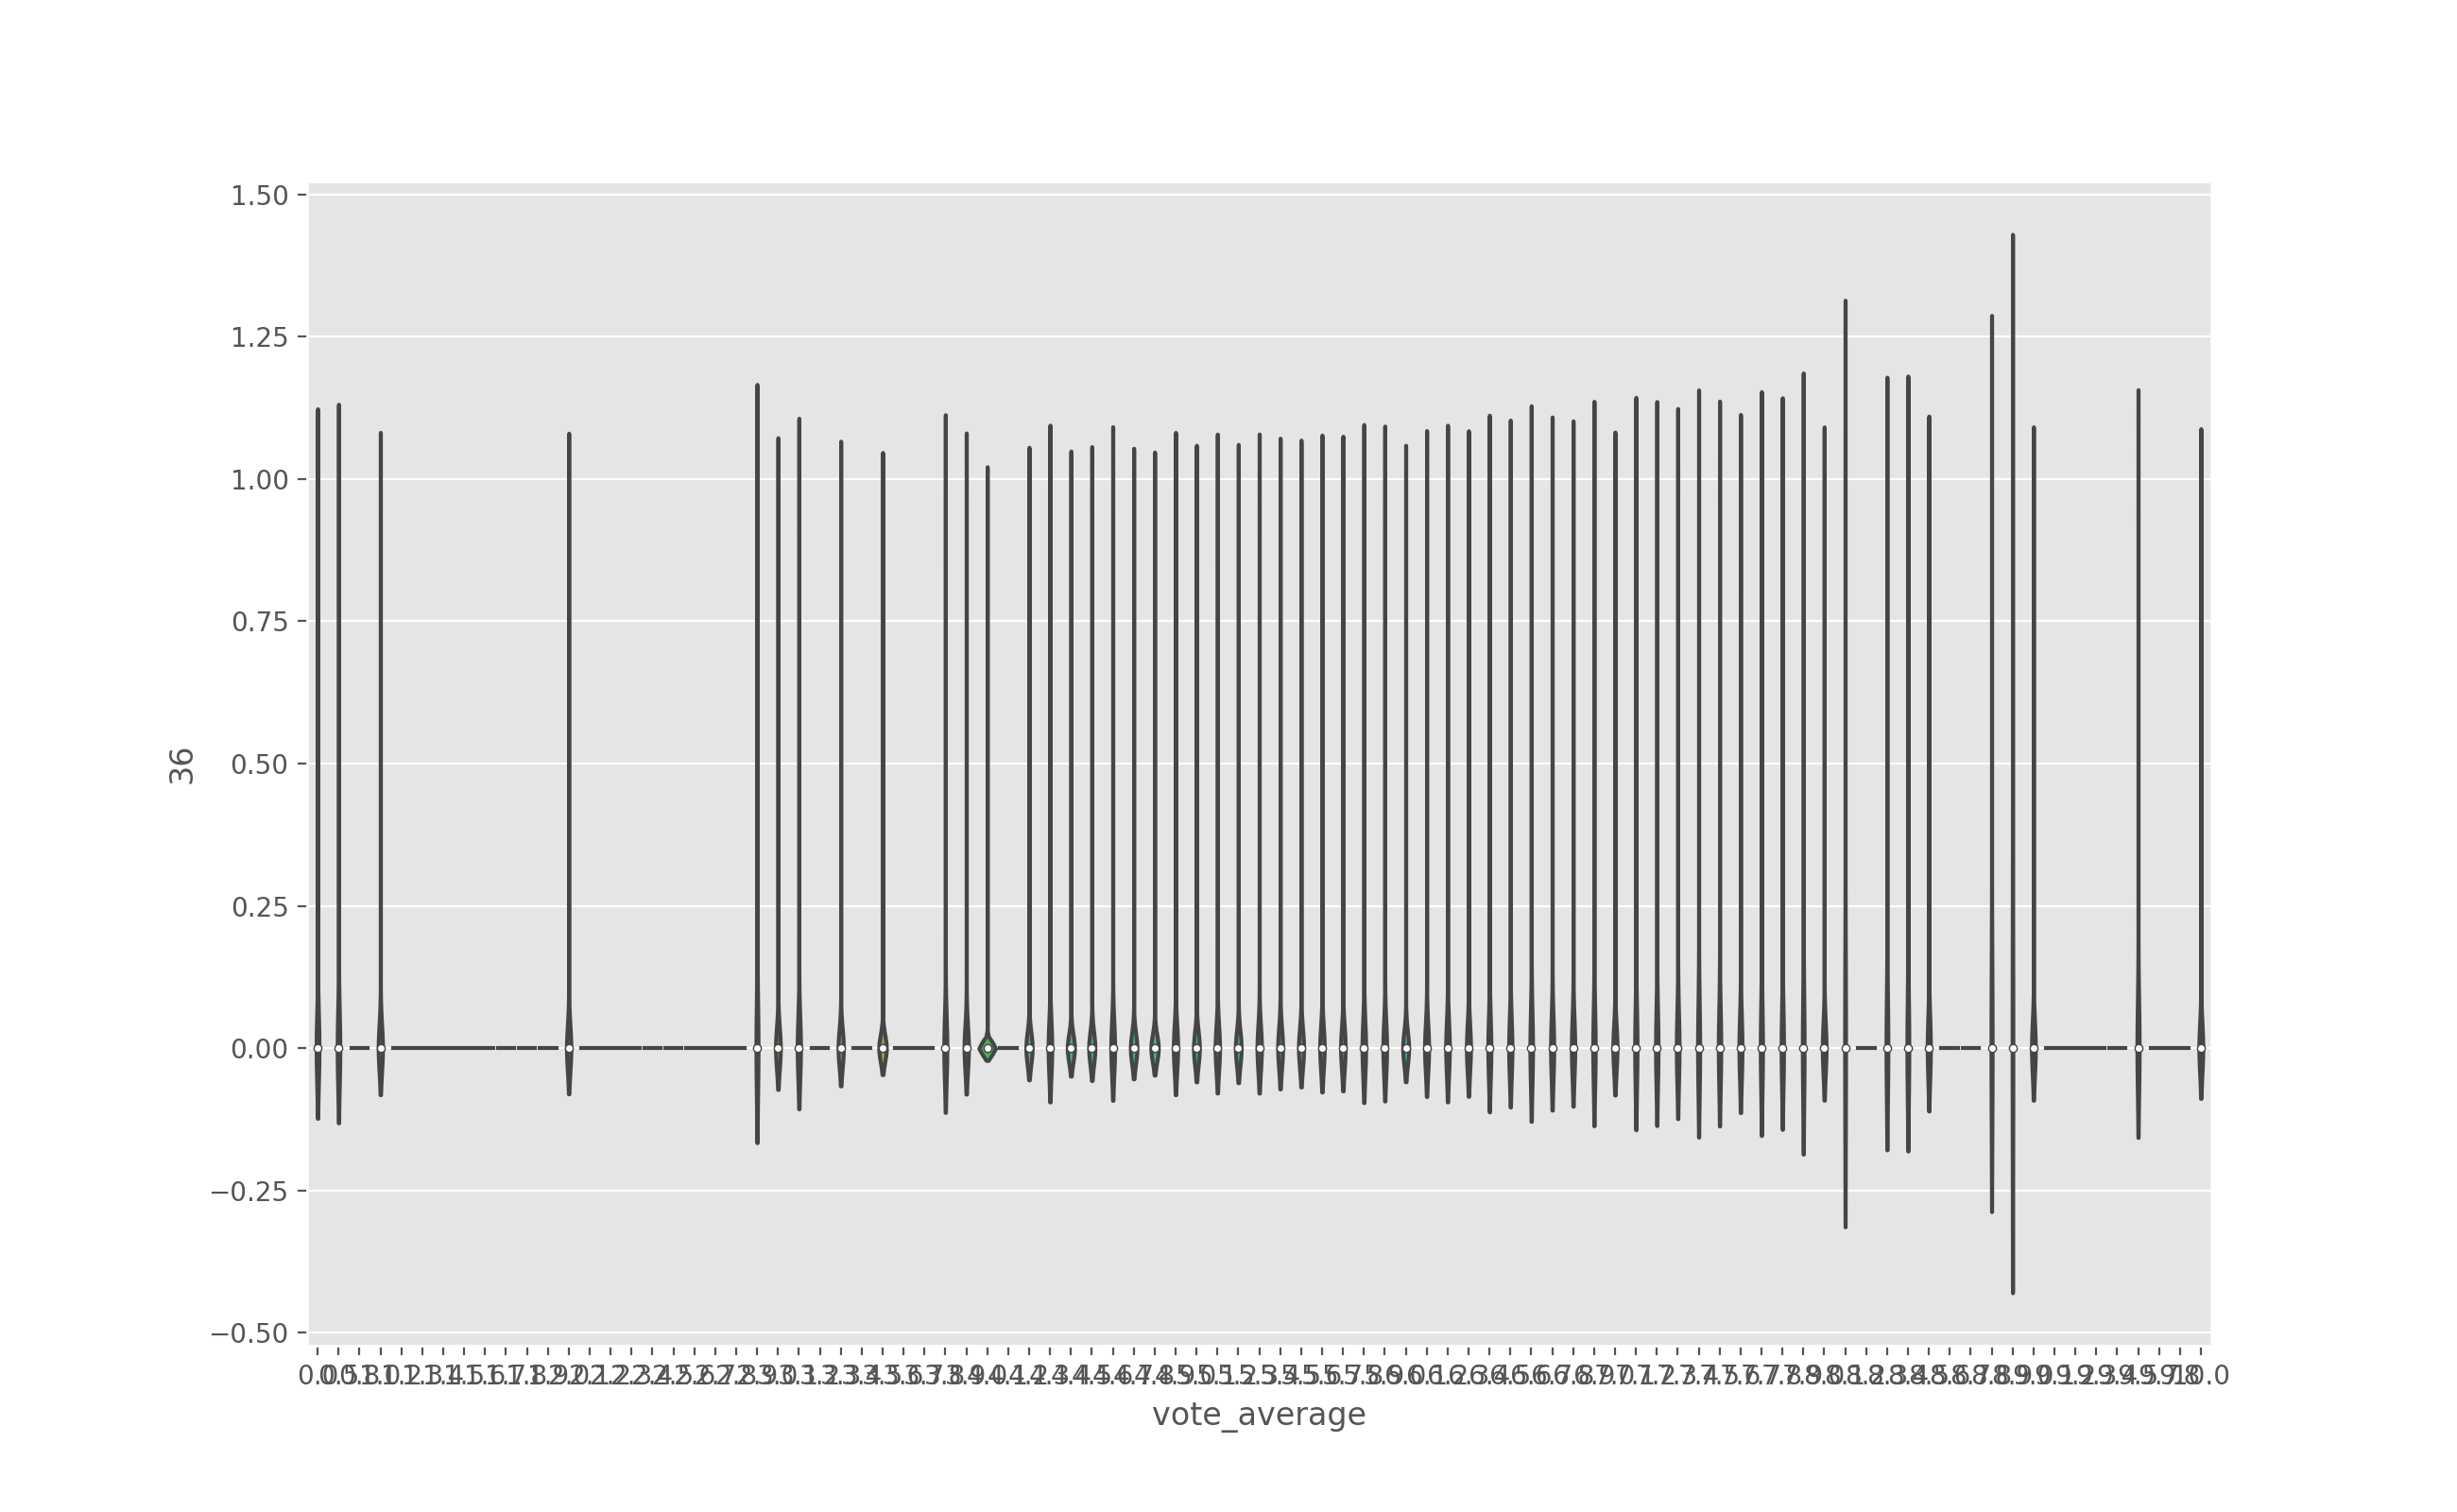

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(13, 8))
sns.violinplot(x='vote_average', y='36', data=movie_df)
plt.show()

<IPython.core.display.Javascript object>


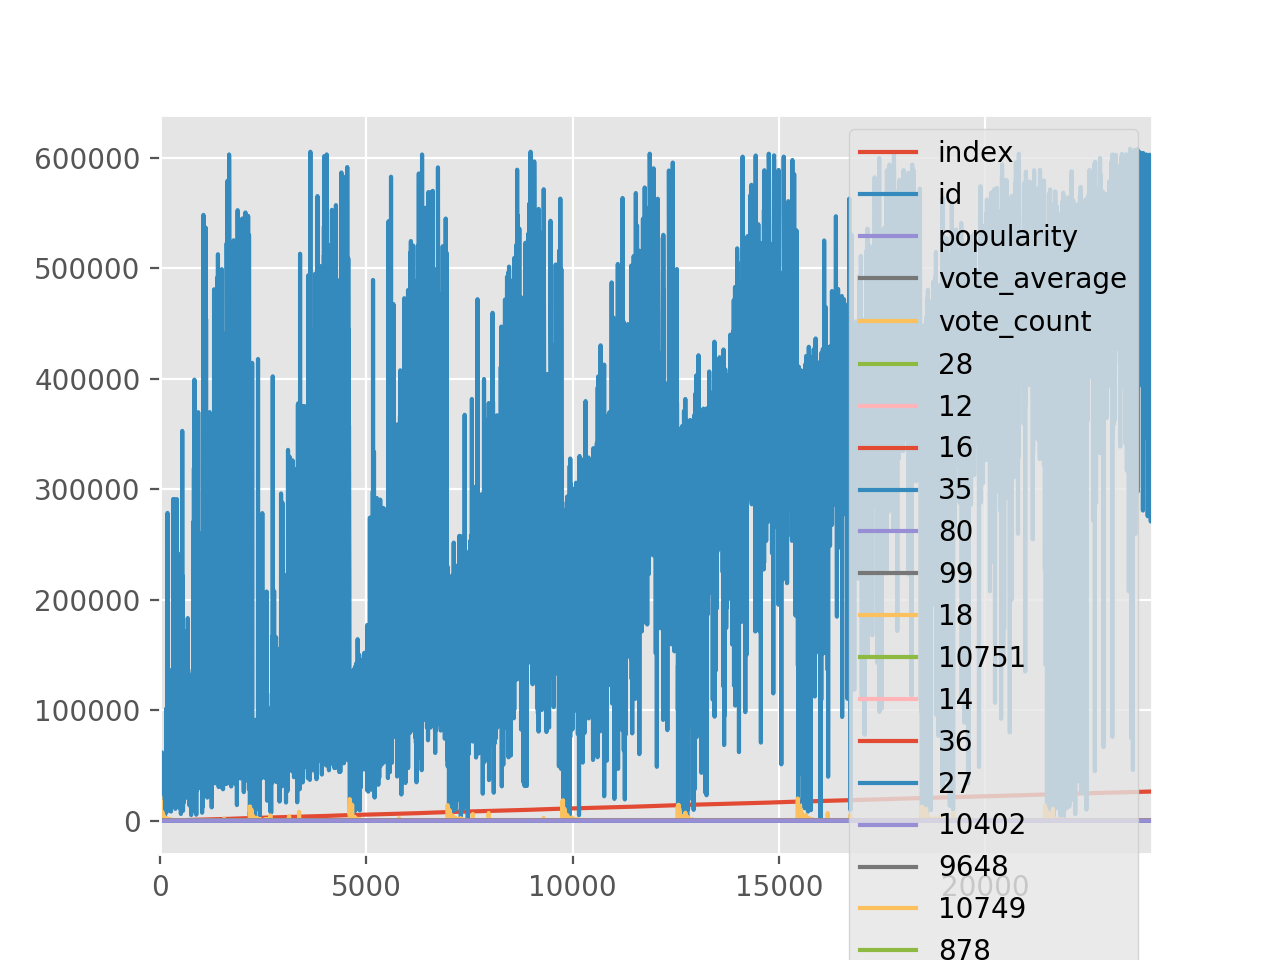

In [78]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('ggplot')
movie_df.plot()

In [351]:
query = f"select * from tmdb_movies m join tmdb_genres g on m.genre_ids=g.id"
df = pd.read_sql(query, conn)
display(df)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,index,id,name


In [341]:
num1 = cur.execute("""SELECT count(original_title) FROM tmdb_movies m """).fetchall()
num2 = cur.execute("""select count(1) from (SELECT distinct original_title FROM tmdb_movies m )""").fetchall()
#df = pd.DataFrame(cur.fetchall())
#df.columns = [x[0] for x in cur.description]
#df
print('original_title', num1[0],num2[0])

original_title (26517,) (24835,)


In [282]:
num1 = cur.execute("""SELECT count(title) FROM tmdb_movies m """).fetchall()
num2 = cur.execute("""select count(1) from (SELECT distinct title FROM tmdb_movies m )""").fetchall()
#df = pd.DataFrame(cur.fetchall())
#df.columns = [x[0] for x in cur.description]
#df
print('title',num1[0],num2[0])
num3 = cur.execute("""SELECT title, count(1) as counts FROM tmdb_movies m group by title having count(1)>1 order by count(1) desc""").fetchall()
df = pd.DataFrame(num3)
df.columns = [x[0] for x in cur.description]
df

title (26517,) (24688,)


,title,counts
0,Home,7
1,Eden,7
2,Truth or Dare,5
3,The Gift,5
4,The Box,5
...,...,...
1605,100 Streets,2
1606,"10,000 km",2
1607,1 Night,2
1608,'85: The Greatest Team in Pro Football History,2


In [286]:
num4 = cur.execute("""SELECT * FROM tmdb_movies m where title='Home' or title='Eden' or title = '1 Night' order by title,popularity""").fetchall()
df = pd.DataFrame(num4)
df.columns = [x[0] for x in cur.description]
df

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,18016,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107
1,21298,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107
2,13854,[],446332,en,Eden,0.600,2014-10-04,Eden,5.0,2
3,26506,[],561861,en,Eden,0.600,2018-11-25,Eden,0.0,1
4,14989,"[53, 18]",360339,en,Eden,3.061,2015-09-18,Eden,5.4,29
5,11604,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
6,14748,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
7,18019,"[18, 10402]",283330,en,Eden,5.373,2015-06-19,Eden,5.8,57
8,5493,[18],96599,en,Eden,6.877,2012-03-11,Eden,6.8,100
9,20446,"[27, 18, 10751]",381507,en,Home,0.600,2016-03-01,Home,4.7,14


In [237]:
df = cur.execute("""select m.* from tmdb_movies m where m.title<>m.original_title""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,14,"[27, 80]",41439,en,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488
1,49,"[10749, 18]",61979,es,Tres metros sobre el cielo,13.721,2010-12-20,Three Steps Above Heaven,7.5,960
2,67,"[16, 12, 14, 10751]",42949,en,Arthur 3: la guerre des deux mondes,12.679,2010-08-22,Arthur 3: The War of the Two Worlds,5.6,865
3,70,"[80, 18, 9648, 10749]",25376,es,El secreto de sus ojos,12.531,2010-04-16,The Secret in Their Eyes,7.9,1141
4,75,[16],28874,ja,サマーウォーズ,12.275,2010-10-13,Summer Wars,7.5,447
...,...,...,...,...,...,...,...,...,...,...
2539,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1
2540,26422,[14],517676,es,El verano del león eléctrico,0.600,2018-11-12,The Summer of the Electric Lion,6.0,1
2541,26432,"[18, 35]",467746,fr,Contes de Juillet,0.600,2018-03-09,July Tales,6.0,1
2542,26494,[18],567020,es,La última virgen,0.600,2018-05-26,The Last Virgin,2.0,1


In [238]:
df = cur.execute("""select m.* from tmdb_movies m join tmdb_movies m_t Using(id)  where m.title<>m_t.original_title""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,14,"[27, 80]",41439,en,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488
1,49,"[10749, 18]",61979,es,Tres metros sobre el cielo,13.721,2010-12-20,Three Steps Above Heaven,7.5,960
2,67,"[16, 12, 14, 10751]",42949,en,Arthur 3: la guerre des deux mondes,12.679,2010-08-22,Arthur 3: The War of the Two Worlds,5.6,865
3,70,"[80, 18, 9648, 10749]",25376,es,El secreto de sus ojos,12.531,2010-04-16,The Secret in Their Eyes,7.9,1141
4,75,[16],28874,ja,サマーウォーズ,12.275,2010-10-13,Summer Wars,7.5,447
...,...,...,...,...,...,...,...,...,...,...
2701,26409,"[10749, 18]",551634,zh,你好，之华,0.600,2018-11-09,Last Letter,6.0,1
2702,26422,[14],517676,es,El verano del león eléctrico,0.600,2018-11-12,The Summer of the Electric Lion,6.0,1
2703,26432,"[18, 35]",467746,fr,Contes de Juillet,0.600,2018-03-09,July Tales,6.0,1
2704,26494,[18],567020,es,La última virgen,0.600,2018-05-26,The Last Virgin,2.0,1


In [275]:
movies_title_clean = {}

#df = cur.execute("""select m.id, m.title, replace(replace(title, ':', ' '),',',' ')as new_title from tmdb_movies m """)
df = cur.execute("""select m.id, m.title from tmdb_movies m """)
for ind, name in cur.fetchall():
    movies_title_clean[ind]=name
    
#df = pd.DataFrame(cur.fetchall())
#df.columns = [x[0] for x in cur.description]
#movies_title_clean = df.to_dict()
#
#df
for ind in movies_title_clean:
    n = movies_title_clean[ind].replace(':',' ')
    n = n.replace(' - ',' ')
    print(n)
#movies_title_clean    
#movies_title_clean['title']


Harry Potter and the Deathly Hallows  Part 1
How to Train Your Dragon
Iron Man 2
Toy Story
Inception
Percy Jackson & the Olympians  The Lightning Thief
Avatar
Toy Story 3
Despicable Me
Megamind
Toy Story 2
Alice in Wonderland
The Expendables
Tangled
Saw  The Final Chapter
The Twilight Saga  Eclipse
The Book of Eli
LelleBelle
The Bourne Supremacy
Shutter Island
The Bourne Identity
Knight and Day
The Chronicles of Narnia  The Voyage of the Dawn Treader
Step Up 3D
The A-Team
The King's Speech
Bad Boys
The Last Airbender
Predators
The Social Network
Undisputed III  Redemption
Apollo 13
Armageddon
The Bourne Ultimatum
Clash of the Titans
The Back-Up Plan
Robin Hood
Nanny McPhee and the Big Bang
Shrek Forever After
Easy A
The Sorcerer's Apprentice
Scott Pilgrim vs. the World
Grown Ups
Some Like It Hot
Faster
The Wolfman
Unstoppable
Black Swan
Tinker Bell and the Great Fairy Rescue
Three Steps Above Heaven
Centurion
The Other Guys
The Town
Jonah Hex
TRON  Legacy
Prince of Persia  The Sands of

Nick Jonas & The Administration  Live At Wiltern
The Teacher
Fortune Teller
Cruzando el límite
A Small Act
Danny & Annie
Marathon Boy
Clutch  Fortune Tellers Make a Killing Nowadays
Chronological Order
One, the Story of a Goal
The Universe 7 Wonders of the Solar System in 3D
Stonewall Uprising
Love and Theft
El espíritu de la salsa
Harp Dreams
Zero
For the Good of Others
The Sentimental Engine Slayer
The Lottery
The Paranoids
Last Remaining Light
The Guardian
Honest Man  The Life of R. Budd Dwyer
Staring Into the Sun
Andre
Who Took the Bomp? Le Tigre on Tour
Brutal Beauty  Tales of the Rose City Rollers
Broad Street Bullies
Fashion Victim
Five Star Day
New Garage Explosion  In Love with These Times
Card Subject To Change
Frank DanCoolo  Paranormal Drug Dealer
Sci-Fi High  The Movie Musical
Westbrick Murders
Killer Clown
Alice in Nephernalia
The Last Vampire On Earth
Vampegeddon
Deception
Re-Generator
The Manifesto  The Globalist Agenda and You
Close Enemy
Pastor Shepherd
Dirty Pictures

A Happy Event
The Phantom of the Opera at the Royal Albert Hall
Le Havre
The Hedgehog
Good Neighbours
Vincent Wants to Sea
Tactical Force
A Better Life
Bully
Beautiful Boy
My Piece of the Pie
Mr. Nice
Magic Beyond Words  The JK Rowling Story
Swamp Shark
Tanner Hall
Life in a Day
Woody Allen  A Documentary
In Darkness
Blood Out
Being Elmo  A Puppeteer's Journey
The Way
Attenberg
The Music Never Stopped
Trigun  Badlands Rumble
VIPs
Pariah
Beloved
Men in the City 2
Cyberbully
Prowl
Tom and Jerry & The Wizard of Oz
DeadHeads
United
2012  Ice Age
Rabies
The PyraMMMid
Paradise Lost 3  Purgatory
Freerunner
Another Happy Day
The Greatest Movie Ever Sold
Lucky
Bobby Fischer Against the World
Killer Mountain
In Her Skin
Lego Star Wars  The Padawan Menace
Beethoven's Christmas Adventure
ChromeSkull  Laid to Rest 2
Bellflower
Choose
The Countess
Transformers  Dark of the Moon
L!fe Happens
Romeos
Fred 2  Night of the Living Fred
Born to Race
In the Name of the King 2  Two Worlds
Cross
Thin Ice
Batt

Textuality
Getting That Girl
Dorfman in Love
Norm MacDonald  Me Doing Standup
Poolboy Drowning Out the Fury
Stuck Between Stations
Coffin
Resurrect Dead  The Mystery of the Toynbee Tiles
Biology 101
Angels Crest
The Dead Inside
Rage
His Way
Archie's Final Project
Bablo
Tupac Uncensored and Uncut  The Lost Prison Tapes
Bloody Mary
Khodorkovsky
The Speed of Thought
Blank City
The Frontier Boys
Hot Coffee
Evil Bong 3  The Wrath of Bong
More Brains! A Return to the Living Dead
Home
And Baby Will Fall
Almighty Thor
What Happens Next
The Victim
Stripperland
Son of Morning
The Summer of Massacre
Carnal Innocence
Trading Christmas
Occupant
Making the Boys
Garbo  The Spy
The Dynamiter
The Case for Christmas
Bong of the Dead
Deadly Sibling Rivalry
Craig Ferguson  Does This Need to Be Said?
The Confession
House Call
The Chateau Meroux
I Got Next
Always Kabhi Kabhi
Rosa
Beast Beneath
The Hagstone Demon
The Green
A Crush on You
Secrets From Her Past
Deadtime Stories 2
Ballistica
In Our Name
The Dis

The Yellow Wallpaper
Shoot the Moon
Caitlin Plays Herself
Lord Byron
Gotan Project   Tango 3.0 Live at The Casino de Paris
Brian Eno 1971–1977  The Man Who Fell To Earth
12 Counts Of Deception
Aries Spears  Hollywood, Look I'm Smiling
Paranoia
The China Question
The Pact
The Wishmakers
Who Is Simon Miller?
Autoerotic
Martha Argerich & Mischa Maisky
The Quest
Rufus Hound  Being Rude
Bomb Patrol Afghanistan
Too Much Pussy! Feminist Sluts, a Queer X Show
Searching for Sonny
Gaga by Gaultier
Bikini Detectives
Silent Night, Dead Night  A New Christmas Carol
Followed
The Search for Michael Rockefeller
My Name Was Bette  The Life and Death of an Alcoholic
Potpourri
9/11  Stories in Fragments
The Wayman Tisdale Story
The Long, Slow Death of a Twenty-Something
Back to the Beyond
The Fergusons
The Midnight Disease
Losing Gracie
Lovely Monster
Oliver's Ghost
Dot Got Shot
The Teacher's Lounge
The Walking Dead Girls
3 Blind Saints
The Back-up Bride
Ctrl+Alt+Compete
Finding Kind
Taking Shelter
Natio

Legatee
Dear Dracula
The Aggression Scale
Truth In 24 II  Every Second Counts
The Eleventh Victim
Devils, Angels & Dating
The Giants
The Preacher's Daughter
About Face  Supermodels Then and Now
Penumbra
Dead Sushi
Johan Falk  Spelets regler
Junction
A Place at the Table
The Marathon
Breathing
Are All Men Pedophiles?
Woman Thou Art Loosed  On the 7th Day
Naked Harbour
August. Eighth
American Animal
I Am Gabriel
Abominable Christmas
Steel Butterfly
MoniKa
Mommies, Happy New Year!
Bobby Yeah
The Man Who Shook the Hand of Vicente Fernandez
My Best Holidays
It's in the Blood
Puppy Love
Another
1812. Ballad of the Uhlans
Led Zeppelin  Celebration Day
The Bates Haunting
Layover
The Jeffrey Dahmer Files
The Last Ride
Snowman's Land
Partly Sunny
41
The Cohasset Snuff Film
The Fitzgerald Family Christmas
Bastard
Elf-Man
Lewis Black  In God We Rust
Stalked at 17
Bad Parents
Sexy Baby
The Wishing Tree
The Colors of Evil
Tears of Steel
My Amityville Horror
Cut/Print
The Dead Want Women
Dreams of a 

Sleeping Dogs
Sorry, Rabbi
Militia Rising
La Llorona
Requiem for a Tuesday
Snack attack
Steve Martin  The Television Stuff
The Chainsaw Sally Show Season 2
King-Size Comedy  Tex Avery and the Looney Tunes Revolution
The Last
Jesus Christ / Joseph Smith
Feed A
Bryan Beller  Mastering Tone and Versatility
L'incoronazione di Poppea
Genius The Movie
Gothic Assassins
El otro fútbol
Innocence of Muslims
The James Holmes Conspiracy
Dipso
Insomnia
Founding Fathers  The Untold Story of Hip Hop
Meditation Creativity Peace
To Dance Like a Man
The Ripping
Empress Vampire
Streets
Hoops & Yoyo's Haunted Halloween
Ms. Cannibal Holocaust
Besa  The Promise
Transmission
Rita Rudner and 3 Potential Ex-Husbands
Following the Ninth  In the Footsteps of Beethoven's Final Symphony
Shift Change
Price Of Gold
Astonishing X-Men  Unstoppable
Astonishing X-Men  Torn
Tim Hawkins Push Pull Point Pow
Disruption
Cat in the Hat  Miles & Miles of Reptiles
Mortal Kombat 20th Anniversary Retrospective
CASS
Bob Dylan & Th

iSteve
The Frankenstein Theory
How to Make Money Selling Drugs
The Christmas Spirit
Angels Sing
Almost Human
Good Night
Jay And Silent Bob's Super Groovy Cartoon Movie
Chastity Bites
Dealin' with Idiots
Last Summer
The Crash Reel
The Out List
Unlucky Charms
Girl Rising
Before the Winter Chill
The Makeover
Chance at Romance
The Priest's Children
Breaking the Girls
Rushlights
Flying Monkeys
Something in the Air
The Rocket
Milius
On the Job
Open Road
Thérèse
Girls Against Boys
Standing Up
The Wicked
No Love in the City 3
Crazy Enough
The Class of '92
Heebie Jeebies
The Employer
Top Cat  The Movie
Wings
One Life
Amy
Batman  The Dark Knight Returns (Deluxe Edition)
The Ultimate Life
Dark Feed
A Second Chance
Madras Cafe
Alone
Go for Sisters
Tyler Perry's Madea Gets A Job The Play
The Punk Singer
Stripped
Red Obsession
Black Plague
The Artist and the Model
Money for Nothing  Inside the Federal Reserve
Sex After Kids
Those Happy Years
Curious George Swings Into Spring
Beast of the Bering Sea


Judas Priest  Epitaph
The Little Tin Man
Bon Voyage
Mayweather vs. Guerrero
Best Kept Secret
These Birds Walk
Plimpton! Starring George Plimpton as Himself
Ronny & I
Bonnie & Clyde
Fool's Day
Levitated Mass
The Book of Manning
Stolen Seas
Ni Jing  Thou Shalt Not Steal
Maz Jobrani  I Come in Peace
Britney  Piece of Me
Real Value
해양경찰 마르코
Garlan Hulse  Where Potential Lives
Don't Forget Love
Feast in a Fallen City
The Mrs. Carter Show World Tour
Secrets of Chatsworth
Cinderoncé
History of Oklahoma Football, Part 2
In Effluence accord; Emulsion
Retracing Home
Reveries
Punching
Tupac Aftermath
How to Abandon Ship
Mysteryquest Odessa
Natives
Battle for the Elephants
It's Your Day
Avenues
Needle
Crossroads  Labor Pains of a New Worldview
Young Lakota
League of Denial  The NFL’s Concussion Crisis
The Last Hit
Legends of Mid-South Wrestling
Tell It On the Mountain
Rope a Dope
American Weightlifting
Istanbul Unveiled
Beyond All Boundaries
Kaddipudi
Captivated
To Go Viking
Waiting for Mamu
Heart

Harmontown
Copenhagen
Kitchen in Paris
The Wonders
Beethoven's Treasure Tail
The German Doctor
Jimmy P.
Sex Ed
Chasing Ghosts
Freezer
Goodbye to All That
Lilting
The Devil's Hand
Sniper  Legacy
Don Peyote
Echoes
Iron Man & Captain America  Heroes United
Sleeping Beauty
The Famous Five 3
Valley Uprising
The Swan Princess  A Royal Family Tale
Easy Money II
Little Accidents
Lovesick
Free to Play
Khoobsurat
Cannibal
Animal
Christmas Under Wraps
Reach Me
By the Gun
National Lampoon Presents  Endless Bummer
The Wedding Pact
Recipe for Love
3 Nights in the Desert
The Coed and the Zombie Stoner
The Editor
Monster High  Freaky Fusion
Delirium
4 Minute Mile
Manny
The World of Kanako
The Hero of Color City
Nowhere Safe
Not Safe for Work
Green Street Hooligans  Underground
The Last Diamond
Batman  Strange Days
Playing Doctor
Indigenous
Garage Sale Mystery  All That Glitters
A LEGO Brickumentary
The Lookalike
Lost Time
Electric Slide
Lap Dance
Wildlike
Revenge of the Green Dragons
Hello Ladies  The

Diving With The Dinosaur Fish
Bill the Galactic Hero
The Minions
Ink
Heavenly Match
The Murders of Brandywine Theater
Snuffet
Border Break
Cheerleader Camp  To The Death
The Biker Warrior Babe vs. The Zombie Babies From Hell
Confessions of a Womanizer
Leslie Sansone  WATP Multi-Mile Mega Walk
Nibiru Return of the Gods
The Yellow Wallpaper
Messer Chups  Total Terror
Skygate 911
LRG 47
The Adventures of Tim and Ben
Tony Cairoli  The Movie
Contrapelo
The Obvious Child
Packard  The Last Shift
Frank Zappa Freak Jazz, Movie Madness & Another Mothers
Riot on the Dance Floor
One Last Hug
Manos  The Hands of Felt
Uriah Heep  Live at Koko
Office Ninja
Limited Partnership
The Zeroes
The Hanover House
Intimate Semaphores
The Outrageous Sophie Tucker
Helium Harvey
Happy March 8th, Men!
Sorority Surrogate
Drunktown's Finest
Sweet Oranges
I'm a Mitzvah
The Muck
We Were Not Made For This World
Gay Lives of Straight Guys
Being Us
Sick Birds Die Easy
Marmato
The Disobedient
Documented
Brothers Hypnotic


Human
Hitchcock/Truffaut
Competition
The Dawns Here Are Quiet
A Country Wedding
The Shamer's Daughter
Maya the Bee Movie
A Very Murray Christmas
Monkey Kingdom
James White
From Vegas to Macau II
Dil Dhadakne Do
The Hunting Ground
The Prophet
Do You Believe?
Soaked in Bleach
Hard to Be a God
Apparition
Woodlawn
Unexpected
Monster High  Haunted
Diary of a Chambermaid
The Bad Education Movie
Dark Summer
The Wolfpack
A Bone to Pick  An Aurora Teagarden Mystery
The Hive
Broken Horses
Caught
Savaged
Best of Enemies
Joe Dirt 2  Beautiful Loser
Lost in the Sun
American Poltergeist
The Death of "Superman Lives"  What Happened?
Nina Forever
People, Places, Things
88
Once Upon A Holiday
Sharknado 3  Oh Hell No!
Requiem for the American Dream
Chi-Raq
Our Times
Walt Before Mickey
A la mala
Winter on Fire  Ukraine's Fight for Freedom
Krisha
Cosmic Scrat-tastrophe
The Humbling
Digging for Fire
Microbe and Gasoline
Zero Tolerance
Ghost in the Shell  The New Movie
The Lovers
Navy Seals vs. Zombies
Ston

Wingman Inc.
A Christmas Eve Conversation With Quentin Tarantino & Paul Thomas Anderson
The Better Half
24 Hours
All American Bully
Summer Forever
What Lola Wants
Sacrifice
Fade to Winter
California Winter
Sting  Into the Light
The House of Mystery
Avunu 2
The Night Visitor
Just Let Go
Model Hunger
Keith Robinson  Back of the Bus Funny
Superhero Fight Club
Nazi Hell
Felix Manalo
The Real X-Files?
Reel Rock 10
Trojan War
A Haunting at the Hoyt Library
Rory Scovel  The Charleston Special
Thao's Library
Invalid
The Guards Themselves
Bigfoot  Blood Trap
Close Before Midnight
Boiling Pot
Pups United
Terror Toons 3
ShadowRing
Abby Singer/Songwriter
WWE  The Kliq Rules
Jeremy Scott  The People's Designer
Dirty Paws
Survivors
The Signal
Boniato
Awaken the Devil
The Sadist
An Irish Exorcism
I Will Dance
The Queen of Code
Trevor Moore  High In Church
Records Collecting Dust
A Small Good Thing
Almost There
The Color of Noise
Anya
The Cannibal in the Jungle
Gameloading  Rise of the Indies
Klansvil

Army of One
Mother's Day
Pokémon the Movie  Diancie and the Cocoon of Destruction
League of Gods
The Family Fang
Complete Unknown
Jack Goes Home
Rules Don't Apply
Norman  The Moderate Rise and Tragic Fall of a New York Fixer
The Love Witch
Sacrifice
Lolo
All Roads Lead to Rome
Into the Forest
Within
My Big Fat Greek Wedding 2
Other People
Zero Days
I Am the Pretty Thing That Lives in the House
Jessica Darling's It List
Sharknado 4  The 4th Awakens
Jeruzalem
Amateur Night
Synchronicity
Pee-wee's Big Holiday
God's Not Dead 2
Tallulah
Tunnel
Dead Rising  Endgame
The Sex Trip
Man Down
Closet Monster
The Ones Below
Almost Christmas
The Confirmation
Blue Mountain State  The Rise of Thadland
Before the Flood
Terminus
Lego Scooby-Doo!  Haunted Hollywood
Tell Me How I Die
Psycho-Pass  The Movie
Ae Dil Hai Mushkil
Dear Zindagi
Baskın
Scooby-Doo! and WWE  Curse of the Speed Demon
Back in the Day
Special Correspondents
A Perfect Day
Satanic
The Young Offenders
Maximum Ride
Grease Live
Being 17
Swo

Bad Black
It Watches
Sleigh Bells Ring
Den of Darkness
Retake
National Bird
Tickling Giants
Terror Birds
Closet Space
Shadow World
Khan Kluay 2
My Mother's Wound
The Loner
Mommy's Little Girl
Live Cargo
To Keep the Light
Christmas with the Andersons
Memory Box
Girl Flu.
Deadpool  From Comics to Screen... to Screen
Star Wars Rebels  Steps Into Shadow
A Husband for Christmas
Sins of Our Youth
Best and Most Beautiful Things
Bourek
Reset
Overwatch Animated Short  Alive
Lights
Late Shift
His Secret Past
Hearts of Spring
Asperger's Are Us
House by the Lake
Ghayal Once Again
Remote Paradise
Desiree
Girl in Woods
I Belonged to You
The Perfect Daughter
Swing State
Author  The JT LeRoy Story
Loserville
Enlighten Us  The Rise and Fall of James Arthur Ray
Kate Plays Christine
A Good Wife
Cut to the Chase
Forsaken
Dam Sharks!
Fare
Moth
Bigfoot vs. Zombies
Breaking the Bank
Pushing Dead
Lazy Eye
The Forest
Map of Hell
Cropped
Homo Sapiens
Casa Vita
Heritage Falls
Miss India America
Finding Sofia
Gri

Outlaw
Waiting for Immortality
New Chefs on the Block
The Cat In The Hat Knows A Lot About Halloween!
The Kinsey Sicks  Electile Dysfunction
Jimbo
Pronouns
Risky Drinking
Tony Roberts  Motorcity Motormouth
Every Brilliant Thing
Pigskin
Gravity is just a habit
Nothing Good Ever Happens
Courier X
5 Doctors
The Past Inside The Present
REBU
Catholics vs. Convicts
Chasing Bubbles
LOCAL58 You Are On The Fastest Available Route
Beyond
The Prequels Strike Back  A Fan's Journey
The Sad and Beautiful World of Sparklehorse
9/11 Inside the Pentagon
Joe Pera Talks You to Sleep
Rev. S.S. Jones Home Movies
Reconstructing Harry
Hollywood Beauty Salon
The Black Jacket
The Red Hot Interview
Theo Who Lived
Serena
He Was a Friend of Him
Straight Outta OZ
The Arrival
Death by Design
RetroAhoy  Quake
Namour
Underfire  The Untold Story of Pfc. Tony Vaccaro
Baby X
The Drew  No Excuse, Just Produce
For Your Own Safety
Nikki Glaser  Perfect
Look at Us Now, Mother!
Off the Rails
Curve
Night School
Untouchable
Th

Sylvio
The Atoning
Devil's Domain
The Wrong Student
Pornocracy  The New Sex Multinationals
The Body Tree
Home for Christmas Day
Christmas in the Air
Something Like Summer
The Killer
Concrete Evidence  A Fixer Upper Mystery
Nickelodeon's Sizzling Summer Camp Special
Gone Fishing
Geo-Disaster
Serpent
The 44th President  In His Own Words
Amanda & Jack Go Glamping
Fatal Crossing
An Accidental Zombie (Named Ted)
One of Us
Hailey Dean Mystery  Dating Is Murder
Woodshock
3 Idiotas
Secrets of Deception
Permanent
Camp Cool Kids
The Ice Cream Truck
Axolotl Overkill
Zoo
Eat, Play, Love
Heartthrob
Even Lovers Get The Blues
My Happy Family
Agent
November
Diana  In Her Own Words
Maria Bamford  Old Baby
Beyond the Spectrum
A Very Sordid Wedding
The Vessel
Human Flow
Central Park
Breakable You
Our Time Will Come
Love on Ice
Deuces
That's Not Me
Norm Macdonald  Hitler's Dog, Gossip & Trickery
Finding Santa
Filmworker
The Joneses Unplugged
A Woman's Life
Dating My Mother
Perfect Bid  The Contestant Who 

Because of Gracia
Love Means Zero
Made Me Do It
#FromJennifer
Red White Black & Blue Odyssey
Maynard
The Dark Hunger
The Cropsey Incident
Alternative Math
Prism
The Plan
Breaking Point
Zombie Pizza
Westworld to Yuma
Chonda Pierce  Enough
Party Night
White Boy
After Auschwitz
Fallen
Extinghuished
Call Your Father
Ken Burns  America's Storyteller
Deconstructing The Beatles' Revolver
I Am Another You
Easy to Learn, Hard to Master  The Fate of Atari
Assholes
Nick Cannon  Stand Up, Don't Shoot
Painted Horses
Trump's Lobby
The Blockchain and Us
Neverending Night  The Making of Blair Witch
Thirst Street
Scary Story Slumber Party
Cats Kill
Clanker Man
The Man with the Gray Elevated Hair
Take Every Wave  The Life of Laird Hamilton
Vermilion
Reindeer Lodge
American Statesman  The Nick Freitas Story
Sham love Series Stop That Wedding
Sound from the Deep
An American in Texas
Swiped
Facing Mecca
Abundant Acreage Available
HairKutt
U2 at The BBC
The Shepherd
A Pot of Boiling Oil
Emilio Guzman  Alle 

Monsters and Men
Step Sisters
Beyond The Sky
The Oath
Never Goin' Back
Dead in a Week (Or Your Money Back)
Sui Dhaaga Made in India
Mazinger Z  Infinity
The Passion of Anna
Lust Stories
Ricky Gervais  Humanity
Andre the Giant
Minding the Gap
Honey  Rise Up and Dance
The Midnight Man
Corbin Nash
Between Worlds
Support the Girls
Adam Sandler  100% Fresh
K.G.F  Chapter 1
Await Further Instructions
Asako I & II
The Cold Blue
Tyrel
22 Chaser
Duck Butter
To Each, Her Own
Marvel Rising  Secret Warriors
Affairs of State
Lake Placid  Legacy
Pokémon the Movie  The Power of Us
The Night Eats the World
Shame
Forgive Us Our Debts
The White Crow
Not Cinderella's Type
Take Your Pills
Higher Power
Malevolent
Piercing
Asher
The Russian Five
S.M.A.R.T. Chase
Big Brother
St. Agatha
Holy Camp!
Tumbbad
Scorched Earth
In the Cloud
Relentless
The Child in Time
Rafiki
The Standoff at Sparrow Creek
Battle Drone
Megalodon
Gone Are the Days
Autumn Sonata
Lizzie
Boundaries
King Lear
My Dinner with Hervé
Frat Pack

Drinksgiving
Into the Dark  Pooka!
Desolation
Garo Kiba  The Dark Knight
Poetry Slammed
Oceans  Our Blue Planet
Amerika Square
Origin Story
Adam Carolla  Not Taco Bell Material
Goldbuster
A Year in My Life
Breslin and Hamill  Deadline Artists
Afraid
Ice Dragon  Legend of the Blue Daisies
Ant Head
John Rick
The Director and The Jedi
Beyond the Opposite Sex
Carter & June
Opposite Of Blood
Ken Block's GYMKHANA TEN  Ultimate Tire Slaying Tour
What We Started
ReMastered  Who Shot the Sheriff
Paranormal Evil
Trump @War
Rise of the Superheroes
The Big Promise
The Story of Harry Potter
Dead List
The Final Year
From Its Mouth Came a River of High-End Residential Appliances
Sofía Niño de Rivera  Natural Selection
ROBYN
Back In My Body
Crittus
Bar Wrestling 21  Breastlemania
Tell 'em Steve-Dave  2018 Christmas Special
The Storyteller
A War Over Reality
Segfault
Stars in the Park  The Right Now
Scream for Help
Royal Romance  The Marriage of Prince Harry and Meghan Markle
No Time to Sleep  The fina